In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import statsmodels as st

In [6]:
dd=pd.read_csv(r'F:\VIRU\New folder\CA 1.csv')

In [7]:
dd.head()

,months,sales
0,2014-01,0
1,2014-02,0
2,2014-03,50
3,2014-04,50
4,2014-05,50


In [8]:
dd.tail()

,months,sales
79,2020-08,1230
80,2020-09,1501
81,2020-10,2130
82,2020-11,1750
83,2020-12,1542


In [9]:
dd['months']=pd.to_datetime(dd['months'])

In [10]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

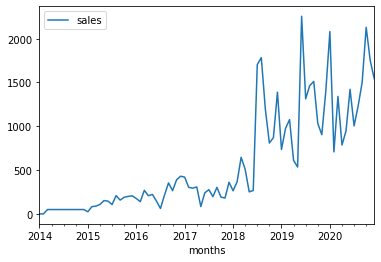

In [11]:
dd.plot()

import statsmodels.api as sm

In [12]:
import statsmodels.api as sm

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
dfuler = adfuller(dd['sales'])

In [15]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(0.2022895031608163,
 0.9723897132329687,
 10,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1043.761604759964)

In [14]:
dd_q=dd.resample('Q').mean()
dd_q.head()

,sales
months,
2014-03-31,16.666667
2014-06-30,50.000000
2014-09-30,50.000000
2014-12-31,50.000000
2015-03-31,65.666667


In [15]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

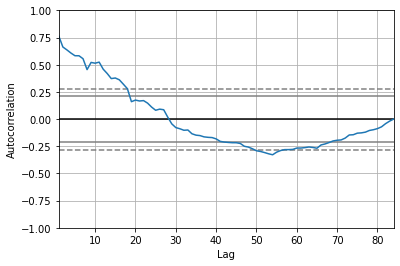

In [16]:
autocorrelation_plot(dd['sales'])
pyplot.show()
#pvalue can be 18 or 19

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

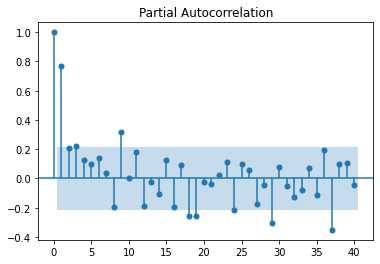

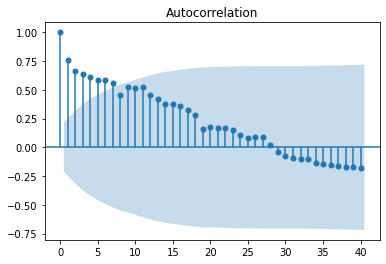

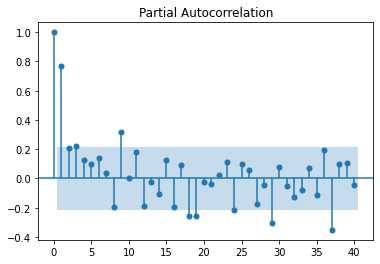

In [18]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)
# q value can be 2 or 3

In [19]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [20]:
model = ARIMA(dd['sales'],order=(1,0,0))
result=model.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   84
Model:                     ARMA(1, 0)   Log Likelihood                -616.176
Method:                       css-mle   S.D. of innovations            368.973
Date:                Tue, 16 Mar 2021   AIC                           1238.351
Time:                        13:10:47   BIC                           1245.644
Sample:                    01-01-2014   HQIC                          1241.283
                         - 12-01-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         593.4923    181.690      3.267      0.001     237.386     949.599
ar.L1.sales     0.7875      0.068     11.585      0.000       0.654       0.921
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2699           +0.0000j            1.2699            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
dd['forecast']=result.predict(start=74,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

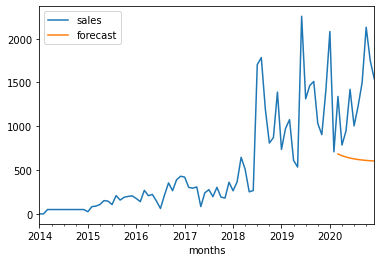

In [23]:
dd[['sales','forecast']].plot()

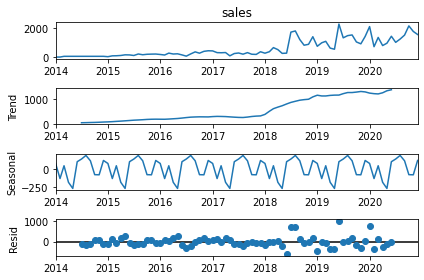

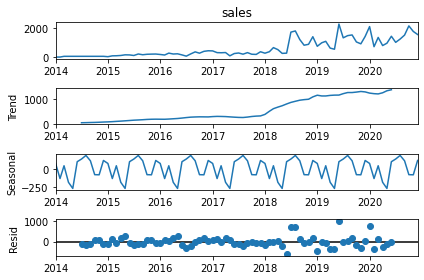

In [24]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [25]:
import statsmodels.api as sm


In [26]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(4,1,0),seasonal_order=(2,1,0,9))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   84
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 9)   Log Likelihood                -540.540
Date:                           Tue, 16 Mar 2021   AIC                           1095.080
Time:                                   13:11:25   BIC                           1111.209
Sample:                               01-01-2014   HQIC                          1101.514
                                    - 12-01-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4408      0.122     -3.603      0.000      -0.681      -0.201
ar.L2         -0.4880      0.119     -4.099      0.000      -0.721      -0.255
ar.L3         -0.2507      0.224     -1.120      0.263      -0.690       0.188
ar.L4         -0.1517      0.156     -0.971      0.331      -0.458       0.154
ar.S.L9       -0.7718      0.125     -6.163      0.000      -1.017      -0.526
ar.S.L18      -0.4247      0.146     -2.917      0.004      -0.710      -0.139
sigma2        1.2e+05   1.27e+04      9.449      0.000    9.51e+04    1.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               151.15
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              62.81   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [243]:
dd['forecast']=results.predict(start=74,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

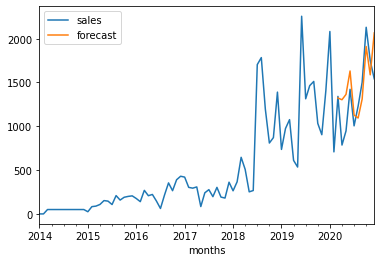

In [244]:

dd[['sales','forecast']].plot()

In [200]:
output=results.forecast(24)

In [201]:
# Predicted sales values
output

2021-01-01    1622.375962
2021-02-01    1307.292011
2021-03-01    1726.689767
2021-04-01    1372.219854
2021-05-01    1432.261490
2021-06-01    1934.938333
2021-07-01    2081.680485
2021-08-01    2218.495369
2021-09-01    2126.143594
2021-10-01    2120.180774
2021-11-01    1968.130657
2021-12-01    2219.506021
2022-01-01    2114.016398
2022-02-01    1798.304651
2022-03-01    2124.633507
2022-04-01    1691.525802
2022-05-01    1719.642088
2022-06-01    2721.477592
2022-07-01    2299.944699
2022-08-01    2460.613521
2022-09-01    2499.122355
2022-10-01    2424.961195
2022-11-01    2237.312014
2022-12-01    2500.576917
Freq: MS, Name: predicted_mean, dtype: float64

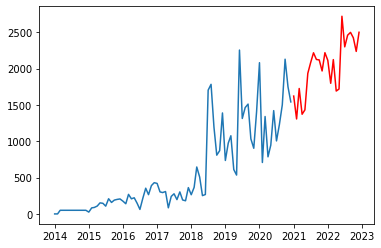

In [202]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')